# Project 4: Wrangle and Analyze Data of <a href="https://en.wikipedia.org/wiki/WeRateDogs">WeRateDogs</a>

<b>Student: Rodrigo Contreras Vielma - contrerasvielma@gmail.com<br>
Date: March 05, 2021 - Santiago, Chile</b>
<hr>
    



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#Gather">Gather</a></li>
        <li><a href="#Assess">Assess</a></li>
        <li><a href="#Clean">Clean</a></li>
    </ul>
<li><a href="#Save">Data Storage</a></li>
<li><a href="#Graph">Data Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction


The goal of this project is gattering data from different sources (Twitter CSV, Image Predictions file based on <a href="https://www.youtube.com/watch?v=2-Ol7ZB0MmU">neural network</a>, Twitter API, and after wrangle to create interesting and trustworthy analyses and visualizations. 

The datasets used to this project are:

<ul>
    <li><b>df_tae (twitter-archive-enhanced.csv):</b> File provided by Udacity.</li>

<li><b>df_ip (image_predictions.tsv):</b> File that was getted from Udacity URL and previusly issued by neural network.</li>

<li><b>df_tj (tweet-json.txt):</b> File that was gathered from Twitter API and finally gathered from Udacity workspace.</li>


</ul>



In [1]:
# Import Libraries
    
import pandas as pd
import requests
import csv
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import datetime
import numpy as np
from IPython.display import Image
import re
import sqlite3
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


<a id='Gather'></a>
## Data Wrangling, Gather



In [2]:
# 1. Read main dataset from csv file
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

# 2. Downloading the second dataset from URL provided by Udacity, using method get.

# Reference: https://requests.readthedocs.io/en/master/user/quickstart/#make-a-request
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
image_predictions = r.text

with open('image_predictions.tsv', mode = 'w') as file:
    file.write(image_predictions)

# 2. Read the second dataset from csv file, previously downloaded from Udacity
df_ip = pd.read_csv('image_predictions.tsv', sep='\t')

# Prepare info to read the third dataset from Twitter API or from the file previously downloaded.

fails_dict_twitter_API = {}

# If file exist, doesn't process the following lines of code (provided by Udacity)

if (os.path.exists('./tweet_json.txt')):
    print("The 'tweet_json.txt' already exist in the Workspace. It's not neccesary to connect to Twitter API to process one more time.")
else:  
    
    tweet_ids = df_tae.tweet_id.values

    print("Quantity of Tweets to be gathered from Twitter API:", len(tweet_ids)) 

    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions

    consumer_key    = 'private code'
    consumer_secret = 'private code'
    access_token    = 'private code'
    access_secret   = 'private code'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
  
    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0

    start = timer()
    
    # Save each tweet's returned JSON as a new line in a .txt file
    
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict_twitter_API[tweet_id] = e
                pass
    end = timer()
    print("Elapsed time of connection to Twitter API (Seconds)", end - start)
    print(fails_dict_twitter_API)




The 'tweet_json.txt' already exist in the Workspace. It's not neccesary to connect to Twitter API to process one more time.


In [3]:
# Check if we have a trouble to download a Twitter record from API.
# Reference: https://www.kite.com/python/answers/how-to-check-if-a-dictionary-is-empty-in-python#:~:text=Use%20bool(dict)%20with%20dict,one%20entry%20evaluate%20to%20True%20.

if (not bool(fails_dict_twitter_API)):
    print("Tweets failed: ", fails_dict_twitter_API)
    
    #Get Tweets ID with a trouble 
    fails_dict_twitter_API.keys()    
    print("Quantity of Tweets with a trouble to get from API:", len(fails_dict_twitter_API.keys()))
    print("\nBecause we have a trouble to get info of all the Tweets or we just have a file, we are going to use the original one of Udacity.")

Tweets failed:  {}
Quantity of Tweets with a trouble to get from API: 0

Because we have a trouble to get info of all the Tweets or we just have a file, we are going to use the original one of Udacity.


In [4]:
# 3. Read the third dataset from Twitter API or from the file previously downloaded.

#Reference: https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas
df_tj = pd.read_json("tweet-json_original_Udacity.txt", lines=True)



<a id='Assess'></a>
## Data Wrangling, Assess


In [5]:
# Assess the first and main dataset.

# Assess first five rows.
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# Assess last five rows.
df_tae.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
# Assess ten aleatory rows.
df_tae.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None
1856,675522403582218240,NaN,NaN,2015-12-12 03:47:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sammy. He's a Motorola Firefox. Hat under...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675522403...,10,10,Sammy,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
26,886983233522544640,NaN,NaN,2017-07-17 16:17:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
781,775729183532220416,NaN,NaN,2016-09-13 16:13:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775729183...,13,10,None,None,None,None,None
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I want to finally rate this ico...,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
753,778774459159379968,NaN,NaN,2016-09-22 01:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: In case you haven't seen the mo...,7.580996e+17,4.196984e+09,2016-07-27 00:40:12 +0000,"https://vine.co/v/hQJbaj1VpIz,https://vine.co/...",13,10,None,None,None,None,None
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mollie. This pic was taken after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,None,None,pupper,None


In [8]:
# Assess the structure of dataframe.

df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Contains 2356 rows in 17 columns of data

In [9]:
# Check duplicated rows.

df_tae.duplicated().sum()

0

We don't have duplicated records.

In [10]:
# Check null total values of each columns.
df_tae.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Probably the columns with high quantity of null will not be relevant to our Analysis.

In [11]:
# Check duplicated Tweets ID.

df_tae.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [12]:
#Reference: https://re-thought.com/pandas-value_counts/

df_tae['tweet_id'].value_counts().loc[lambda x : x > 1].size

0

With these lambda function we check if we have duplicate rows.

In [13]:
# Check counts of unique values of this column.

df_tae.in_reply_to_status_id.astype(str).value_counts()


nan                      2278
6.671521640794235e+17       2
6.670655355705508e+17       1
7.476486538174136e+17       1
8.795538273341727e+17       1
                         ... 
6.717299066283418e+17       1
8.381454986911949e+17       1
6.860340248008622e+17       1
6.749998076819087e+17       1
6.75707330206548e+17        1
Name: in_reply_to_status_id, Length: 78, dtype: int64

We have a strange situation because when I search the string 6.67152164079e+17 don't see that value on the file.


In [14]:
# Check counts of unique values of this column.

df_tae.in_reply_to_user_id.astype(str).value_counts()


nan                      2278
4196983835.0               47
21955058.0                  2
194351775.0                 1
15846407.0                  1
113211856.0                 1
16374678.0                  1
467036706.0                 1
2894131180.0                1
77596200.0                  1
20683724.0                  1
28785486.0                  1
26259576.0                  1
1582853809.0                1
3105440746.0                1
16487760.0                  1
13615722.0                  1
2319108198.0                1
1198988510.0                1
279280991.0                 1
21435658.0                  1
29166305.0                  1
47384430.0                  1
358972768.0                 1
30582082.0                  1
2281181600.0                1
4717297476.0                1
180670967.0                 1
11856342.0                  1
7.305050141505823e+17       1
291859009.0                 1
8.405478643549184e+17       1
Name: in_reply_to_user_id, dtype: int64

In [15]:
# Check counts of unique values of this column.

df_tae.timestamp.value_counts()


2016-03-12 17:47:45 +0000    1
2015-12-18 00:18:36 +0000    1
2016-01-20 01:41:08 +0000    1
2016-08-26 16:37:54 +0000    1
2017-06-12 00:15:36 +0000    1
                            ..
2016-01-06 02:49:55 +0000    1
2016-02-15 01:05:02 +0000    1
2017-01-27 00:24:48 +0000    1
2016-07-24 23:20:20 +0000    1
2016-03-06 05:11:12 +0000    1
Name: timestamp, Length: 2356, dtype: int64

Good, unique records

In [16]:
# Check counts of unique values of this column.

df_tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We see that the main quantity tweet are created from Iphone.

In [17]:
# Check counts of unique values of this column.

df_tae.text.value_counts()

Meet Daisy. She has no eyes &amp; her face has been blurry since birth. Quite the trooper tho. Still havin a blast. 9/10 https://t.co/jcNdw43BIP    1
This is Frankie. He's wearing blush. 11/10 really accents the cheek bones https://t.co/iJABMhVidf                                                   1
This is Monkey. She's supporting owners everywhere with her fancy #PrideMonth bandana. 13/10 love is love is love... https://t.co/lUcpnZDPz9        1
Fun dogs here. Top one clearly an athlete. Bottom one very stable. Not very soft tho. 9/10s would still cuddle both https://t.co/79sHR36NsI         1
This pupper can only sleep on shoes. It's a crippling disease. Tearing his family apart. 12/10 I'd totally pet tho https://t.co/03XlvS8izg          1
                                                                                                                                                   ..
*lets out a tiny whimper and then collapses* ...12/10 https://t.co/BNdVZEHRow                       

In [18]:
# Check counts of unique values of this column.

df_tae['text'].value_counts().loc[lambda x : x > 1].size

0

Good news, We don't have duplicated text.


In [19]:
# Check counts of unique values of this column.
df_tae.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

We see 181 retweeted records

In [20]:
# Check counts of unique values of this column.

df_tae.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [21]:
# Check counts of unique values of this column.

df_tae.retweeted_status_timestamp.value_counts()

2016-07-22 00:43:32 +0000    1
2017-07-15 02:44:07 +0000    1
2016-09-28 00:46:20 +0000    1
2016-09-27 02:53:48 +0000    1
2017-01-11 17:01:16 +0000    1
                            ..
2016-08-08 01:44:46 +0000    1
2017-06-09 16:22:42 +0000    1
2017-01-06 17:33:29 +0000    1
2015-11-20 03:41:59 +0000    1
2016-10-21 18:16:44 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [22]:
# Check counts of unique values of this column.

df_tae.expanded_urls.value_counts()

https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1                                                                                                   2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1                                                                    2
https://twitter.com/dog_rates/status/759923798737051648/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/739238157791694849/video/1                                                                                                                                    2
https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1    2
               

We see a pattern with the string RT @ and `retweeted_status_id` reference a Twitter ID. The following lines were extracted from the file.<br>

666104133288665088,,,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",               Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,,,,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
798576900688019456,,,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041332886651e+17,4196983835.0,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None


718631497683582976,,,2016-04-09 02:47:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",               We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10 https://t.co/D9jbbmPmos,,,,https://twitter.com/dog_rates/status/718631497683582976/photo/1,10,10,None,None,None,None,None
798701998996647937,,,2016-11-16 01:39:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10 https://t…,7.18631497683583e+17,4196983835.0,2016-04-09 02:47:55 +0000,https://twitter.com/dog_rates/status/718631497683582976/photo/1,10,10,None,None,None,None,None


In [23]:
# Check counts of unique values of this column.

df_tae['expanded_urls'].value_counts().loc[lambda x : x > 1].size

79

In [24]:
# Check counts of unique values of this column.

df_tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

it's not as usual a numerator greater than 10. We also see that numerator lower than 10 are strange values.

In [25]:
# Check counts of unique values of this column.

df_tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

it's not as usual a denominator different to 10.

In [26]:
# Check counts of unique values of this column.

df_tae.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
            ... 
Biden          1
Sobe           1
Jeremy         1
Stephanus      1
Aja            1
Name: name, Length: 957, dtype: int64

Probably we have many record with a trouble with names "a", "the", "an", "officially". The pattern is where the first letter begin a lower case.



In [27]:
# Check counts of unique values of this column.

df_tae.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

We can appreciate that the modeling of these table wasn't designed properly. Not according the rules of good practices.<br> 

There are three interrelated rules which make a dataset tidy:
<ul>
    <li>Each variable must have its own column.</li>
    <li>Each observation must have its own row.</li>
<li>Each value must have its own cell.</li>
    </ul>

In [28]:
# Check counts of unique values of this column.

df_tae.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
# Check counts of unique values of this column.

df_tae.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
# Check counts of unique values of this column.

df_tae.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
# Assess the second dataset ip (image_predictions).

# Assess first five rows.
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
# Assess last five rows.
df_ip.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [33]:
# Assess ten aleatory rows.
df_ip.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
944,704364645503647744,https://pbs.twimg.com/media/CcZn6RWWIAAmOZG.jpg,1,Pembroke,0.980695,True,Cardigan,0.018504,True,Chihuahua,0.000215,True
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Labrador_retriever,0.089022,True,clumber,0.081800,True
836,694206574471057408,https://pbs.twimg.com/media/CaJRMPQWIAA1zL9.jpg,1,Shih-Tzu,0.352547,True,toy_poodle,0.155720,True,Maltese_dog,0.116657,True
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
1737,821886076407029760,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,1,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,Irish_setter,0.151631,True
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False


We appreciate that the columns p1, p2 and p3 are not consistent with capital case or lowercase. 

In [34]:
# Assess the structure of dataframe.

df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Contains 2075 rows in 12 columns of data

In [35]:
# Check duplicated rows.

df_ip.duplicated().sum()

0

We don't have duplicated records.

In [36]:
# Check null total values of each columns.
df_ip.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

We don't have null values

In [37]:
# Check null total values of each columns.
df_ip.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
# Check duplicated Tweets.

df_ip.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [39]:
# Check counts of unique values of this column.

df_ip.jpg_url.value_counts()

https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg                                            1
https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg                                            1
https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg                                            1
https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg                                            1
https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg                       

We see duplicated pictures of different tweets (Corresponding a one retweet). For example:

800141422401830912	https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg	3	golden_retriever	0.938048	True	kuvasz	0.0251195	True	Labrador_retriever	0.0229773	True<BR>
820446719150292993	https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg	3	golden_retriever	0.938048	True	kuvasz	0.0251195	True	Labrador_retriever	0.0229773	True


In [40]:

Image(url='https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg', width=500) 

In [41]:
# Check counts of unique values of this column.

df_ip.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [42]:
# Check counts of unique values of this column.

df_ip.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
stove                   1
park_bench              1
bannister               1
leaf_beetle             1
rapeseed                1
Name: p1, Length: 378, dtype: int64

We see strange values, for example: web_site, microphone, coffee_mug, restaurant, tick, book_jacket

In [43]:
# Check counts of unique values of this column.

df_ip.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [44]:
# Check distribution of this column.

df_ip.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [45]:
# Check counts of unique values of this column.

df_ip.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [46]:
# Check counts of unique values of this column.

df_ip.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
umbrella                1
crib                    1
sliding_door            1
bathing_cap             1
cockroach               1
Name: p2, Length: 405, dtype: int64

We see strange words. For example: computer_keyboard, desk, stove, cloak, umbrella, lifeboat, confectionery

In [47]:
# Check counts of unique values of this column.

df_ip.p2_conf.value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [48]:
# Check distribution of this column.

df_ip.p2_conf.astype(float).describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [49]:
# Check counts of unique values of this column.

df_ip.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [50]:
# Check counts of unique values of this column.

df_ip.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
acorn                  1
guillotine             1
screw                  1
traffic_light          1
chest                  1
Name: p3, Length: 408, dtype: int64

We see strange words. For example: sunglass, greenhouse, hatchet, dugong, barber_chair, rifle, pool_table, etc.

In [51]:
# Check counts of unique values of this column.

df_ip.p3_conf.value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [52]:
# Check distribution of this column.

df_ip.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [53]:
# Check counts of unique values of this column.

df_ip.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [54]:
# Assess the third dataset tj (tweet_json).

# Assess first five rows.
df_tj.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [55]:
# Assess last five rows.
df_tj.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [56]:
# Assess ten aleatory rows.
df_tj.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1318,2016-03-06 05:11:12+00:00,706346369204748288,706346369204748288,This is Koda. She's a Beneboom Cumberwiggle. 1...,False,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 706346354252095488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3768,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1533,2016-01-21 01:07:23+00:00,689977555533848577,689977555533848576,Happy Wednesday here's a pup wearing a beret. ...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689977549053673473, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1490,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1209,2016-03-31 02:09:32+00:00,715360349751484417,715360349751484416,This is Bertson. He just wants to say hi. 11/1...,False,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 715360342210166784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5955,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1660,2016-01-01 16:30:13+00:00,682962037429899265,682962037429899264,This is Darrel. He just robbed a 7/11 and is i...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682962022129135616, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,26239,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
54,2017-07-02 21:58:53+00:00,881633300179243008,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,False,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.816070e+17,...,129,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
75,2017-06-23 01:10:23+00:00,878057613040115712,878057613040115712,This is Emmy. She was adopted today. Massive r...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 878057599261745152, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42876,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
237,2017-03-29 16:00:12+00:00,847116187444137987,847116187444137984,Unbelievable... We. Only. Rate. Dogs. Please s...,False,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847116177323253760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,23108,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1490,2016-01-28 21:54:41+00:00,692828166163931137,692828166163931136,This pupper just descended from heaven. 12/10 ...,False,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692828155242004480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3148,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
820,2016-08-29 03:00:36+00:00,770093767776997377,770093767776997376,RT @dog_rates: This is just downright precious...,False,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 741067297519869955, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Jun 10 00:39:48 +0000 2016...,NaN,NaN,NaN


In [57]:
# Asses the structure of one line of Tweet Json file.

rows = [json.loads(line) for line in open('tweet-json_original_Udacity.txt')]

display(rows[0])


{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [58]:
# Assess the structure of dataframe.

df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Contains 2354 rows in 31 columns of data, inside same columns and rows we have a json structure with more detailed data.

In [59]:
# Relevant columns to our analysis.

df_tj[['id','favorite_count','retweet_count']]

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [60]:
# Check duplicated Tweets.

df_tj.id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: id, Length: 2354, dtype: int64

In [61]:
df_tj.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [62]:
df_tj.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

### Quality
#### `df_tae (twitter archive enhanced)` table
- 1) Column `tweet_id` is better to convert to string.
- 2) Column `timestamp` is in object datatype. Will be converted to datetime.
- 3) The rows with data on the columns `retweeted_status_id` will be deleted (According to the Key points we need "You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets").
- 4) Column `expanded_urls`. Check if is it normal that we have 79 duplicate rows (Will be deleted when apply step 3). We need tweets with images, according key points described on step 3.
- 5) The columns `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are irrelevants to our analysis because are referencing to a real tweets.
"RT @" and `retweeted_status_id` reference a Twitter ID.
- 6) The columns `name` presents a lot of words no related a dogs. For example "a", "the", "an", "officially". The pattern is where the first letter begin with a lower case.
- Column `rating_numerator` have anormal values.
- Column `rating_denominator` have anormal values.
- Columns `doggo`,`floofer`, `pupper`, `puppo`. We can appreciate that the modeling of these table wasn't designed properly. Not according the rules of good practices of Tidiness.<br> 
- Replace "\n" character to " " on colum `text` to export data in one line.
- Consolidate rating in one column `rating_score`.


#### `df_ip (images predictions)` table
- 7) Column `tweet_id` is better to convert to string.
- 8) We appreciate that the columns `p1`, `p2`, `p3` are not consistent with capital case or lowercase. 
- 9) We see duplicated pictures of different tweets (Corresponding a one retweet). For example Tweets ID: 800141422401830912, 820446719150292993.
- The columns `p1`, `p2`, `p3` have records without a properly classifier of breed dog. For example: web_site, microphone, coffee_mug, restaurant, tick, book_jacket, computer_keyboard, desk, stove, cloak, umbrella, lifeboat, confectionery, sunglass, greenhouse, hatchet, dugong, barber_chair, rifle, pool_table, etc.
- 10) Create two new colums `breed_dog`, `confidence`that consolidate the model predictions about breed of dog.



#### `tj (tweet json)` table
- 11) It's has a big structure, we only get the columns (`id`,`favorite_count`,`retweet_count`)
- 12) Column `id` will be renamed to `tweet_id` for merge.

### Tidiness

According to rules about tidy data (http://www.jeannicholashould.com/tidy-data-in-python.html) we need to:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.
<br>

- A) We need to consolidate in a one column the three columns in `df_tae` table (doggo, floofer, pupper, puppo).
- B) We need to merge all dataframes.






<a id='Clean'></a>
## Data Wrangling, Data Cleaning

In [63]:

# Create a copy of each data set to clean data.

df_tae_clean = df_tae.copy()
df_ip_clean  = df_ip.copy()
df_tj_clean  = df_tj.copy()


### Cleaning Data ( quality issues )

#### 1) `df_tae_clean (twitter archive enhanced)`: Convert Tweet_id to string



#### Define
Convert `tweet_id` to string

#### Code

In [64]:
df_tae_clean['tweet_id'] = df_tae_clean['tweet_id'].astype(str)

#### Test

In [65]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [66]:
df_tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2) `df_tae_clean (twitter archive enhanced)`: Convert timestamp to datetime

#### Define
Convert `timestamp` to datetime

#### Code

In [67]:
# Convert format to datetime.

df_tae_clean['timestamp'] = pd.to_datetime(df_tae_clean['timestamp'], format="%Y-%m-%d %H:%M:%S")

#### Test

In [68]:
df_tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [69]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

We appreciate timestamp with datetime64

#### 3) `df_tae_clean (twitter archive enhanced)`: Drop retweets.  The rows with data on the columns in_reply_to_status_id, in_reply_to_user_id will be deleted (According to the Key points we need "You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets").

#### Define
Drops tweet with retweets. One patterns is when the `text` start with the string"RT @"

#### Code

In [70]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html
#df_tae_clean[df_tae_clean['text'].str.startswith("RT @")].count()

In [71]:
df_tae_clean.retweeted_status_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [72]:
# Create a list with tweets ID that will be deleted.
# Reference: https://datatofish.com/convert-pandas-dataframe-to-list/

deleted_tweet_id1_list = df_tae_clean[df_tae_clean.retweeted_status_id.notnull()]['tweet_id'].values.tolist()

In [73]:
len(deleted_tweet_id1_list)

181

In [74]:
deleted_tweet_id1_list

['888202515573088257',
 '886054160059072513',
 '885311592912609280',
 '879130579576475649',
 '878404777348136964',
 '878316110768087041',
 '877611172832227328',
 '874434818259525634',
 '873697596434513921',
 '873337748698140672',
 '872668790621863937',
 '871166179821445120',
 '869988702071779329',
 '868639477480148993',
 '867072653475098625',
 '866816280283807744',
 '866094527597207552',
 '863471782782697472',
 '861769973181624320',
 '860981674716409858',
 '860924035999428608',
 '860177593139703809',
 '858860390427611136',
 '857062103051644929',
 '856602993587888130',
 '856330835276025856',
 '855245323840757760',
 '855138241867124737',
 '852936405516943360',
 '851953902622658560',
 '851861385021730816',
 '849668094696017920',
 '847978865427394560',
 '847971574464610304',
 '845459076796616705',
 '845098359547420673',
 '842892208864923648',
 '841833993020538882',
 '840761248237133825',
 '840728873075638272',
 '839290600511926273',
 '838916489579200512',
 '838831947270979586',
 '838201503

In [75]:
# Leave only valid tweets

df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_id.isnull()]

#### Test

In [76]:
df_tae_clean.shape

(2175, 17)

Our dataframe decrease from 2356 to 2175 rows (181 minus).

#### 4) `df_tae_clean (twitter archive enhanced)`:  Column `expanded_urls`. Check if is it normal that we have 79 duplicate rows (Will be deleted when apply step 3). We need tweets with images, according key points described on step 3.

#### Define
Drop rows that don't have expanded_urls

#### Code

In [77]:
df_tae_clean.expanded_urls.notnull().value_counts()

True     2117
False      58
Name: expanded_urls, dtype: int64

In [78]:
# Create a list with tweets ID that will be deleted.
# Reference: https://datatofish.com/convert-pandas-dataframe-to-list/

deleted_tweet_id2_list = df_tae_clean[df_tae_clean.expanded_urls.isnull()]['tweet_id'].values.tolist()

In [79]:
len(deleted_tweet_id2_list)

58

In [80]:
# Leave only valid tweets

df_tae_clean = df_tae_clean[df_tae_clean.expanded_urls.notnull()]

#### Test

In [81]:
df_tae_clean.shape

(2117, 17)

Our dataframe decrease from 2175 to 2117 rows (58 minus).

In [82]:
df_tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 5) `df_tae_clean (twitter archive enhanced)`: Drop columns that not necessary to our analysis.

#### Define
Drops colums `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`


#### Code

In [83]:
# Drop columns not necessary to our analysis.

df_tae_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 
                   'retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1 , inplace= True)

#### Test

In [84]:
df_tae_clean.shape

(2117, 11)

Our dataframe decrease from 17 to 11 columns (6 minus).

#### 6) `df_tae_clean (twitter archive enhanced)`: We have many record with a trouble with names "a", "the", "an", "officially". The pattern is where the first letter begin a lower case.

#### Define
Correct the name of dogs or convert to None.


#### Code

In [85]:
# Check name that begin with lowercase.

#  https://stackoverflow.com/questions/33313453/selection-of-lowercase-words-in-a-list-on-python
bad_names_list = [i for i in df_tae_clean['name'] if i[0].islower()]
print(bad_names_list)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [86]:
# Reference: https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
    
pd.set_option('display.max_colwidth', 0)


In [87]:
df_tae_clean.name.value_counts()

None       622
a          55 
Charlie    11 
Lucy       11 
Oliver     10 
           .. 
Chase      1  
Tiger      1  
Jay        1  
Biden      1  
Aja        1  
Name: name, Length: 956, dtype: int64

In [88]:
df_tae_clean[df_tae_clean.name.isin(bad_names_list)][['name','text']]

,name,text
22,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
169,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
...,...,...
2349,an,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
2350,a,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
2352,a,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2353,a,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR


We appreciate that the mistake is almost always after "This is", "Here is". It's not easy find a the name of dog to solve this situation, so we are going to convert to None.

In [89]:
df_tae_clean[df_tae_clean.name.isin(bad_names_list)]['text']

22      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                              
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF       
169     We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9              
193     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335     There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7                                                          
                                                          ...                                                                                    

In [90]:
# Reference:  https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas/36910033
# Reference:https://www.programcreek.com/python/example/41297/numpy.select

df_tae_clean['name'] = np.select([df_tae_clean.name.isin(bad_names_list)], ['None'], default = df_tae_clean.name)

#### Test

In [91]:
df_tae_clean.name.value_counts()

None       726
Lucy       11 
Charlie    11 
Cooper     10 
Oliver     10 
           .. 
Huck       1  
Teddy      1  
Scott      1  
Ester      1  
Aja        1  
Name: name, Length: 931, dtype: int64

In [92]:
df_tae_clean.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1585,686947101016735744,2016-01-12 16:25:26+00:00,This is Jackson. He was specifically told not to sleep in the fridge. Damn it Jackson. 11/10 would squeeze softly https://t.co/lJs10ZJsgj,https://twitter.com/dog_rates/status/686947101016735744/photo/1,11,10,Jackson,None,None,None,None
2128,670303360680108032,2015-11-27 18:09:09+00:00,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,None,None,None,None,None
33,885984800019947520,2017-07-14 22:10:11+00:00,Viewer discretion advised. This is Jimbo. He will rip ur finger right h*ckin off. Other dog clearly an accessory. 12/10 pls pet with caution https://t.co/BuveP0uMF1,https://twitter.com/dog_rates/status/885984800019947520/photo/1,12,10,Jimbo,None,None,None,None
2321,666435652385423360,2015-11-17 02:00:15+00:00,"""Can you behave? You're ruining my wedding day""\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU",https://twitter.com/dog_rates/status/666435652385423360/photo/1,10,10,None,None,None,None,None
1675,682242692827447297,2015-12-30 16:51:48+00:00,This is Samson. He patrols his waters on the back of his massive shielded battle dog. 11/10 https://t.co/f8dVgDYDFf,https://twitter.com/dog_rates/status/682242692827447297/photo/1,11,10,Samson,None,None,None,None
840,767122157629476866,2016-08-20 22:12:29+00:00,This is Rupert. You betrayed him with bath time but he forgives you. Cuddly af 13/10 https://t.co/IEARC2sRzC,"https://twitter.com/dog_rates/status/767122157629476866/photo/1,https://twitter.com/dog_rates/status/767122157629476866/photo/1",13,10,Rupert,None,None,None,None
709,785170936622350336,2016-10-09 17:31:53+00:00,This is Hero. He was enjoying the car ride until he remembered that bees are dying globally at an alarming rate. 11/10 https://t.co/cubFg7F4qQ,"https://twitter.com/dog_rates/status/785170936622350336/photo/1,https://twitter.com/dog_rates/status/785170936622350336/photo/1,https://twitter.com/dog_rates/status/785170936622350336/photo/1,https://twitter.com/dog_rates/status/785170936622350336/photo/1",11,10,Hero,None,None,None,None
1096,736365877722001409,2016-05-28 01:18:00+00:00,This is Rory. He's extremely impatient. 11/10 settle down pupper https://t.co/e3tfXJLi40,"https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1",11,10,Rory,None,None,pupper,None
1742,679462823135686656,2015-12-23 00:45:35+00:00,Meet Hurley. He's the curly one. He hugs every other dog he sees during his walk. 11/10 for spreading the love https://t.co/M6vqkt2GKV,https://twitter.com/dog_rates/status/679462823135686656/photo/1,11,10,Hurley,None,None,None,None
494,813187593374461952,2016-12-26 01:00:05+00:00,We only rate dogs. Please don't send in other things like this very good Christmas tree. Thank you... 13/10 https://t.co/rvSANEsQZJ,https://twitter.com/dog_rates/status/813187593374461952/photo/1,13,10,None,None,None,None,None


In [93]:
[i for i in df_tae_clean['name'] if i[0].islower()]

[]

Good news, We don't have lower names.

#### Others i) `df_tae_clean (twitter archive enhanced)`: Clean "\n" in column `text` to export in one line.


#### Define
Clean "\n" to export data in one line.


#### Code

In [94]:
# Reference: https://stackoverflow.com/questions/29251378/replace-n-in-a-string-in-python-2-7
# Reference: https://texthandler.com/info/remove-line-breaks-python/
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
# Reference: https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python#:~:text=Access%20a%20specific%20pandas.,old%20values%20to%20new%20values.


df_tae_clean['text'] = df_tae_clean.text.str.replace('\n', ' ')
df_tae_clean['text'] = df_tae_clean.text.str.replace(r'\n', ' ')
df_tae_clean['text'] = df_tae_clean.text.str.replace('\\n', ' ')
df_tae_clean['text'] = df_tae_clean.text.str.replace(r'\\n', ' ')


#### Test

In [95]:
df_tae_clean.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Others ii.1) `df_tae_clean (twitter archive enhanced)`: Column `rating_numerator` have anormal values (decimal values that not correct on `rating_numerator`)

#### Define
Correct values on `rating_numerator` 

#### Code

In [96]:

df_tae_clean[df_tae_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]

/Users/rodrigocontreras/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


We see an error on tweet_id = 883482846933004288 (ID 45), the rating_numerator must be 13.5 instead 5.

In [97]:
all_extracted_numerators = df_tae_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)


In [98]:
all_extracted_numerators

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [99]:
all_extracted_numerators[0].loc[45]

'13.5'

In [100]:
all_extracted_numerators[0]

0       13
1       13
2       12
3       13
4       12
        ..
2351    5 
2352    6 
2353    9 
2354    7 
2355    8 
Name: 0, Length: 2117, dtype: object

In [101]:
 df_tae_clean['rating_numerator'] = all_extracted_numerators[0]

#### Test

In [102]:
df_tae_clean[df_tae_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]

/Users/rodrigocontreras/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


Now, We see on tweet_id = 883482846933004288 (ID 45), the correct rating_numerator 13.5

#### Others ii.2) `df_tae_clean (twitter archive enhanced)`: Column `rating_numerator`  and `rating_denominator` will be converted to float.

#### Define
Column `rating_numerator`  and `rating_denominator` will be converted to float.

#### Code

In [103]:
df_tae_clean['rating_numerator'] = df_tae_clean['rating_numerator'].astype(float)
df_tae_clean['rating_denominator'] = df_tae_clean['rating_denominator'].astype(float)

#### Test

In [104]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   text                2117 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2117 non-null   float64            
 5   rating_denominator  2117 non-null   float64            
 6   name                2117 non-null   object             
 7   doggo               2117 non-null   object             
 8   floofer             2117 non-null   object             
 9   pupper              2117 non-null   object             
 10  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 278.5+ KB


#### Others ii.3) `df_tae_clean (twitter archive enhanced)`: Analysis of values of rating_numerator

#### Define
Check if `rating_numerator` have anormal values

#### Code

In [105]:
df_tae_clean.rating_numerator.value_counts()

12.00      489
10.00      436
11.00      417
13.00      295
9.00       154
8.00       98 
7.00       52 
14.00      40 
5.00       33 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
0.00       2  
13.50      1  
24.00      1  
84.00      1  
143.00     1  
50.00      1  
420.00     1  
60.00      1  
44.00      1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
121.00     1  
9.75       1  
99.00      1  
204.00     1  
45.00      1  
165.00     1  
1776.00    1  
80.00      1  
Name: rating_numerator, dtype: int64

In [106]:
# Reference: https://stackoverflow.com/questions/34317149/pandas-groupby-with-bin-counts

bins = [1, 5, 10, 15, 20, 500, 1000, 2000]
groups = df_tae_clean.groupby(pd.cut(df_tae_clean.rating_numerator, bins))
groups.rating_numerator.count()

rating_numerator
(1, 5]          77  
(5, 10]         773 
(10, 15]        1244
(15, 20]        0   
(20, 500]       15  
(500, 1000]     0   
(1000, 2000]    1   
Name: rating_numerator, dtype: int64

In [107]:
df_tae_clean[df_tae_clean.rating_numerator > 10].sort_values(by='rating_numerator', ascending=False)[:5]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33+00:00,After so many requests... here you go. Good dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23+00:00,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,None,None,None,None,None


It is a surprise that the first numerator is a number as large as 1776.

At first I thought it was a mistake, and my intention was to delete the records above a numerator of 20. When reviewing the tweet I observe that it is a dog and that it is correctly entered.

https://twitter.com/dog_rates/status/749981277374128128


Eventually, all the records with numerators> 20 or less than 5 could be eliminated. Finally, I will not do it since I could lose significant information. 

#### Test

No Apply

#### Others ii) `df_tae_clean (twitter archive enhanced)`: Consolidate rating in one column `rating_score`.


#### Define
Consolidate rating in one column `rating_score`. 

#### Code

In [108]:
df_tae_clean['rating_score'] = df_tae_clean['rating_numerator'] / df_tae_clean['rating_denominator']



#### Test

In [109]:
df_tae_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_score
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,1.2


#### Others iii) `df_tae (twitter archive enhanced)`:  Drop columns `rating_numerator`, `rating_denominator`.


#### Define
Drop columns `rating_numerator`, `rating_denominator`.

#### Code

In [110]:
# Dropping old Name columns 
df_tae_clean.drop(columns =["rating_numerator", "rating_denominator"], inplace = True) 

#### Test

In [111]:
df_tae_clean.head()

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2


#### Others iv) `df_tae_clean (twitter archive enhanced)`:  Change name of column `text` to avoid error and confusion with datatype text of SqlLite3


#### Define
Change name of column `text`.

#### Code

In [112]:

df_tae_clean.rename(columns={'text': 'tweet_text'}, inplace=True)

#### Test

In [113]:
df_tae_clean.head()

,tweet_id,timestamp,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2


#### 7) `df_ip_clean (image predictions)`: Convert Tweet_id to string



#### Define
Convert Tweet_id to string

#### Code

In [114]:
df_ip_clean['tweet_id'] = df_ip_clean['tweet_id'].astype(str)

#### Test

In [115]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [116]:
df_ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 8) `df_ip_clean (image predictions)`:  Convert to lowercase.

#### Define
We appreciate that the columns p1, p2 and p3 are not consistent with capital case or lowercase. So I am going to convert all to lowercase.


#### Code

In [117]:
# Reference: https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python#:~:text=Use%20str.,a%20DataFrame%20string%20column%20lowercase&text=%22first_column%22%5D.-,str.,%5B%22first_column%22%5D%20lowercase.

df_ip_clean['p1'] = df_ip_clean['p1'].str.lower()
df_ip_clean['p2'] = df_ip_clean['p2'].str.lower()
df_ip_clean['p3'] = df_ip_clean['p3'].str.lower()


#### Test

In [118]:
df_ip_clean [['p1','p2', 'p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english_springer,german_short-haired_pointer
2071,paper_towel,labrador_retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


In [119]:
# Reference  https://stackoverflow.com/questions/23410083/pandas-multiple-columns-into-one-column/48785561

df_ip_clean['p1'].append(df_ip_clean['p2'].append(df_ip_clean['p3'])).reset_index(drop=True).value_counts()


golden_retriever      290
labrador_retriever    283
chihuahua             185
pembroke              143
cardigan              116
                     ... 
confectionery         1  
jeep                  1  
red_wolf              1  
bookshop              1  
espresso              1  
Length: 633, dtype: int64

#### 9) `df_ip_clean (image predictions)`:   We see duplicated pictures of different tweets (Corresponding a one retweet). For example Tweets ID: 800141422401830912, 820446719150292993.

#### Define
Delete rows that correspond to retweets.


#### Code

In [120]:
# Reference: https://www.geeksforgeeks.org/python-union-two-lists/

deleted_tweet_id_all_list = deleted_tweet_id1_list + deleted_tweet_id2_list


In [121]:
len(deleted_tweet_id_all_list)

239

In [122]:
df_ip_clean.shape

(2075, 12)

In [123]:
df_ip_clean = df_ip_clean[~df_ip_clean.tweet_id.isin(deleted_tweet_id_all_list)]

#### Test

In [124]:
df_tae_clean[df_tae_clean['tweet_id'] == '800141422401830912']

,tweet_id,timestamp,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score
584,800141422401830912,2016-11-20 00:59:15+00:00,This is Peaches. She's the ultimate selfie sidekick. Super sneaky tongue slip appreciated. 13/10 https://t.co/pbKOesr8Tg,"https://twitter.com/dog_rates/status/800141422401830912/photo/1,https://twitter.com/dog_rates/status/800141422401830912/photo/1,https://twitter.com/dog_rates/status/800141422401830912/photo/1",Peaches,None,None,None,None,1.3


In [125]:
df_ip_clean[df_ip_clean['tweet_id'] == '800141422401830912']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,labrador_retriever,0.022977,True


In [126]:
df_tae_clean[df_tae_clean['tweet_id'] == '820446719150292993']

,tweet_id,timestamp,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score


In [127]:
df_ip_clean[df_ip_clean['tweet_id'] == '820446719150292993']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [128]:
df_ip_clean.shape

(1994, 12)

The rows of our dataframe decrease from 2075 to 1994 (81 rows minus)

#### 10) `df_ip_clean (image predictions)`:   Consolidate model prediction with breed of dog and level of confidence

#### Define
Create two new columns with breed of dog and level of confidence. After clean columns. Adjust datatype to float (confidence), after round with 4 decimals.

#### Code

In [129]:
df_ip_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [130]:
# Reference: http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
# We are going to calculate the max confidence value with a true value in px_dog

def consolidate_prediction(row):

    max_confidence = 0
    confidence_by_model = 0
    breed_by_model = ''
    
    if row['p1_dog']:
        max_confidence = row['p1_conf']
        confidence_by_model = row['p1_conf']
        breed_by_model = row['p1']
    
    if row['p2_dog']:
        if row['p2_conf'] > max_confidence:
            max_confidence = row['p2_conf']
            confidence_by_model = row['p2_conf']
            breed_by_model = row['p2']
    
    if row['p3_dog']:
        if row['p3_conf'] > max_confidence:
            max_confidence = row['p3_conf']
            confidence_by_model = row['p3_conf']
            breed_by_model = row['p3']            

    if max_confidence == 0:
        return('NotDog|0')
    else:
        return (breed_by_model + '|' + str(max_confidence))


In [131]:
# Use .apply to save the new column if we'd like
df_ip_clean['consolidate_prediction'] = df_ip_clean.apply(consolidate_prediction, axis=1)


In [132]:
# Reference https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

# new data frame with split value columns 
new = df_ip_clean["consolidate_prediction"].str.split("|", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df_ip_clean["breed_dog"]= new[0] 
  
# making separate last name column from new data frame 
df_ip_clean["confidence"]= new[1]
  
# Dropping old Name columns 
df_ip_clean.drop(columns =["consolidate_prediction"], inplace = True) 

In [133]:
df_ip_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_dog,confidence
993,708119489313951744,https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg,1,norwich_terrier,0.264483,True,norfolk_terrier,0.258786,True,chow,0.096899,True,norwich_terrier,0.264483
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,chihuahua,0.287201,True,boston_bull,0.250920,True,whippet,0.141012,True,chihuahua,0.28720100000000004
775,689659372465688576,https://pbs.twimg.com/media/CZIpimOWcAETFRt.jpg,1,bustard,0.225221,False,koala,0.057625,False,goose,0.053569,False,NotDog,0
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,labrador_retriever,0.986548,True,golden_retriever,0.008862,True,chihuahua,0.000694,True,labrador_retriever,0.986548
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,labrador_retriever,0.128128,True,siamese_cat,0.091241,False,labrador_retriever,0.128128
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False,NotDog,0
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,west_highland_white_terrier,0.918144,True,maltese_dog,0.025721,True,lakeland_terrier,0.020211,True,west_highland_white_terrier,0.918144
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,siberian_husky,0.304902,True,eskimo_dog,0.155147,True,malamute,0.050942,True,siberian_husky,0.304902
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False,NotDog,0
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,labrador_retriever,0.643690,True,american_staffordshire_terrier,0.102684,True,dalmatian,0.050008,True,labrador_retriever,0.64369


The model prediction try to get a good information but sometimes make a mistakes. For example with the next case.

In [134]:
df_ip_clean[df_ip_clean.tweet_id == '673240798075449344']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_dog,confidence
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,airedale,0.443004,True,brown_bear,0.114162,False,chesapeake_bay_retriever,0.094639,True,airedale,0.443004


In [135]:

Image(url=df_ip_clean[df_ip_clean['tweet_id'] == '673240798075449344']['jpg_url'].to_string(index=False), width=500) 

In many other cases the model working fine (golden_retriever with a good confidence	0.7726)

In [136]:
df_ip_clean[df_ip_clean.tweet_id == '706516534877929472']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_dog,confidence
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,labrador_retriever,0.071665,True,golfcart,0.020993,False,golden_retriever,0.7726850000000001


In [137]:
Image(url=df_ip_clean[df_ip_clean['tweet_id'] == '706516534877929472']['jpg_url'].to_string(index=False), width=500) 

In [138]:
# Dropping old Name columns 
df_ip_clean.drop(columns =["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog", ], inplace = True) 

In [139]:
df_ip_clean['confidence'] = df_ip_clean['confidence'].astype(float)

In [140]:
df_ip_clean['confidence'] = round(df_ip_clean['confidence'], 4)

#### Test

In [141]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1994 non-null   object 
 1   jpg_url     1994 non-null   object 
 2   img_num     1994 non-null   int64  
 3   breed_dog   1994 non-null   object 
 4   confidence  1994 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 93.5+ KB


In [142]:
df_ip_clean.sample(10)

,tweet_id,jpg_url,img_num,breed_dog,confidence
54,667044094246576128,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,golden_retriever,0.7653
1132,728387165835677696,https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,1,collie,0.2664
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,labrador_retriever,0.4769
1013,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.7900
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.9761
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,pembroke,0.9874
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,eskimo_dog,0.6157
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.8724
1194,740359016048689152,https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg,1,golden_retriever,0.8637
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.5566


#### 11) `df_tj_clean (Tweets Json )`: It's has a big structure, we only get the columns `id`, `favorite_count`, `retweet_count`

#### Define
Drop columns that don't we need to our analysis.

#### Code

In [143]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [144]:
list(df_tj_clean)


# Drop columns not necessary to our analysis.

df_tj_clean.drop(['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 'extended_entities', 
                  'favorited', 'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
                  'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 
                  'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive',
                  'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
                  'retweeted_status', 'source', 'truncated', 'user', 'retweeted'], axis= 1 , inplace= True)

In [145]:

df_tj_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Test

In [146]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### 10) `df_tj_clean (Tweets Json)`: Column id will be renamed to tweet_id and convert to string.


#### Define
Raname column `id` and convert to string

#### Code

In [147]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [148]:
df_tj_clean.rename(columns={'id': 'tweet_id'}, inplace=True)


In [149]:
df_tj_clean['tweet_id'] = df_tj_clean['tweet_id'].astype(str)

In [150]:
df_tj_clean = df_tj_clean[['tweet_id', 'favorite_count', 'retweet_count']]

#### Test

In [151]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


The size of this dataset (df_tj_clean) is bigger than (df_tae_clean). Could be a good idea to drop rows innecesary. Merge use a left join to preserve the rows of df_tae_clean.

In [152]:
df_tj_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Cleaning Data ( 2 tidiness issues )

#### A) `df_tae_clean (twitter archive enhanced)`: We need to consolidate in a one column the three columns (doggo, floofer, pupper, puppo).

#### Define
Consolidate in a one column the three columns (doggo, floofer, pupper, puppo).

#### Code

In [153]:
def consolidate_stage(row):
    
    final_stage_list = []
    
    if row['doggo'] != 'None':
        final_stage_list.append(row['doggo'])
    
    if row['floofer'] != 'None':
        final_stage_list.append(row['floofer'])

    if row['pupper'] != 'None':
        final_stage_list.append(row['pupper'])

    if row['puppo'] != 'None':
        final_stage_list.append(row['puppo'])
    
    if (len(final_stage_list) == 0):
        return ('Undefined')
    else:
        return ('-'.join(final_stage_list))


In [154]:
#df_tae_clean['kind_dog'] = df_tae_clean['tweet_text'].str.lower().str.extract('(doggo|floofer|pupper|puppo)').fillna('Undefined')

# Use .apply to save the new column if we'd like


df_tae_clean['kind_dog'] = df_tae_clean.apply(consolidate_stage, axis=1) 

In [155]:
df_tae_clean.loc[(df_tae_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) == 0][:3]

,tweet_id,timestamp,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score,kind_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3,Undefined
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3,Undefined
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2,Undefined


In [156]:
df_tae_clean.loc[(df_tae_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) == 1][:3]

,tweet_id,timestamp,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score,kind_dog
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,doggo,None,None,None,1.4,doggo
12,889665388333682689,2017-07-25 01:55:32+00:00,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,None,None,None,None,puppo,1.3,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,Stuart,None,None,None,puppo,1.3,puppo


In [157]:
df_tae_clean.loc[(df_tae_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1][:3]

,tweet_id,timestamp,tweet_text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_score,kind_dog
191,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,None,doggo,None,None,puppo,1.3,doggo-puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",None,doggo,floofer,None,None,1.1,doggo-floofer
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,Dido,doggo,None,pupper,None,1.3,doggo-pupper


In [158]:
df_tae_clean.drop(['doggo', 'floofer','pupper', 'puppo'], axis= 1 , inplace= True)

In [159]:
df_tae_clean['kind_dog'].value_counts()

Undefined        1779
pupper           222 
doggo            72  
puppo            23  
doggo-pupper     10  
floofer          9   
doggo-puppo      1   
doggo-floofer    1   
Name: kind_dog, dtype: int64

#### Test

In [160]:
df_tae_clean.sample(10)

,tweet_id,timestamp,tweet_text,expanded_urls,name,rating_score,kind_dog
1232,713175907180089344,2016-03-25 01:29:21+00:00,Say hello to Opie and Clarkus. Clarkus fell asleep so Opie buried him. Ruthless af 10/10 for both https://t.co/xT7XaY4gnW,https://twitter.com/dog_rates/status/713175907180089344/photo/1,Opie,1.0,Undefined
2182,668992363537309700,2015-11-24 03:19:43+00:00,This is Harrison. He braves the snow like a champ. Perched at all times. Hasn't blinked in months. 8/10 v nifty dog https://t.co/tiVuq6MNwl,https://twitter.com/dog_rates/status/668992363537309700/photo/1,Harrison,0.8,Undefined
1257,710296729921429505,2016-03-17 02:48:31+00:00,This is Oshie. 12/10 please enjoy (vid by @catherinec1389) https://t.co/VmtzwAuotq,https://vine.co/v/iw9hUFAMerV,Oshie,1.2,Undefined
2344,666071193221509120,2015-11-16 01:52:02+00:00,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,None,0.9,Undefined
1796,677301033169788928,2015-12-17 01:35:24+00:00,This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak,https://twitter.com/dog_rates/status/677301033169788928/photo/1,Juckson,0.5,Undefined
1578,687317306314240000,2016-01-13 16:56:30+00:00,This is Tyrone. He's a leaf wizard. Self-motivated. No eyes (tragic). Inspirational af. 11/10 enthusiasm is tangible https://t.co/pRp1Npucbz,"https://twitter.com/dog_rates/status/687317306314240000/photo/1,https://twitter.com/dog_rates/status/687317306314240000/photo/1",Tyrone,1.1,Undefined
1065,740711788199743490,2016-06-09 01:07:06+00:00,Here we are witnessing the touchdown of a pupnado. It's not funny it's actually very deadly. 9/10 might still pet https://t.co/CmLoKMbOHv,https://twitter.com/dog_rates/status/740711788199743490/photo/1,None,0.9,Undefined
1237,712309440758808576,2016-03-22 16:06:19+00:00,"Reminder that we made our first set of stickers available! All are 12/10 would stick Use code ""pupper"" at checkout🐶 https://t.co/kJIMNyMNKV",https://twitter.com/stickergrub/status/709919141004595201,None,1.2,pupper
986,749064354620928000,2016-07-02 02:17:13+00:00,Meet Winston. He's pupset because I forgot to mention that it's Canada Day today. 11/10 please forgive me Winston https://t.co/xEY8dbJxnF,"https://twitter.com/dog_rates/status/749064354620928000/photo/1,https://twitter.com/dog_rates/status/749064354620928000/photo/1",Winston,1.1,Undefined
1677,682059653698686977,2015-12-30 04:44:28+00:00,This is Tess. Her main passions are shelves and baking too many cookies. 11/10 https://t.co/IriJlVZ6m4,"https://twitter.com/dog_rates/status/682059653698686977/photo/1,https://twitter.com/dog_rates/status/682059653698686977/photo/1",Tess,1.1,Undefined


I see interesting things. For example Tweet id 670838202509447168 (https://twitter.com/dog_rates/status/670838202509447168) have a lower rating_numerator = 4 and the image is not a dog. Also the breed_dog is Undefined. It's a good idea to review all tweets with a small numerators.

In [161]:
df_tae_clean[df_tae_clean['tweet_id'] == '670838202509447168']

,tweet_id,timestamp,tweet_text,expanded_urls,name,rating_score,kind_dog
2076,670838202509447168,2015-11-29 05:34:25+00:00,Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet https://t.co/QY5uvMmmQk,https://twitter.com/dog_rates/status/670838202509447168/photo/1,None,0.4,Undefined


In [162]:
df_ip_clean[df_ip_clean['tweet_id'] == '670838202509447168']

,tweet_id,jpg_url,img_num,breed_dog,confidence
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,NotDog,0.0


In [163]:
Image(url='https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg', width=500) 

In [164]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2117 non-null   object             
 1   timestamp      2117 non-null   datetime64[ns, UTC]
 2   tweet_text     2117 non-null   object             
 3   expanded_urls  2117 non-null   object             
 4   name           2117 non-null   object             
 5   rating_score   2117 non-null   float64            
 6   kind_dog       2117 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 212.3+ KB


In [165]:
df_tae_clean.shape

(2117, 7)

#### B)  We need to merge all dataframes.

#### Define
Merge all dataframes

#### Code

In [166]:
df_tae_clean.shape

(2117, 7)

In [167]:
df_tj_clean.shape

(2354, 3)

In [168]:
df_ip_clean.shape

(1994, 5)

In [169]:
df_tam_clean = pd.merge(df_tae_clean, df_tj_clean, on='tweet_id', how='left', suffixes=('_left', '_right'))

In [170]:
df_tam_clean.shape

(2117, 9)

In [171]:
df_tam_clean.head()

,tweet_id,timestamp,tweet_text,expanded_urls,name,rating_score,kind_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,1.3,Undefined,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,1.3,Undefined,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,1.2,Undefined,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,1.3,Undefined,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,1.2,Undefined,41048,9774


In [172]:
df_tam_clean = pd.merge(df_tam_clean, df_ip_clean, on='tweet_id', how='left', suffixes=('_left', '_right'))

In [173]:
df_tam_clean.shape

(2117, 13)

#### Test

In [174]:
df_tam_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2117 non-null   object             
 1   timestamp       2117 non-null   datetime64[ns, UTC]
 2   tweet_text      2117 non-null   object             
 3   expanded_urls   2117 non-null   object             
 4   name            2117 non-null   object             
 5   rating_score    2117 non-null   float64            
 6   kind_dog        2117 non-null   object             
 7   favorite_count  2117 non-null   int64              
 8   retweet_count   2117 non-null   int64              
 9   jpg_url         1994 non-null   object             
 10  img_num         1994 non-null   float64            
 11  breed_dog       1994 non-null   object             
 12  confidence      1994 non-null   float64            
dtypes: datetime64[ns, UTC](1), float6

In [175]:
df_tam_clean.sample(10)

,tweet_id,timestamp,tweet_text,expanded_urls,name,rating_score,kind_dog,favorite_count,retweet_count,jpg_url,img_num,breed_dog,confidence
100,870308999962521604,2017-06-01 16:00:09+00:00,"This is Rumble, but he's not ready to. Would rather fall asleep in his bath bucket. 13/10 would attempt a boop without waking https://t.co/MVQCzrF1g9","https://twitter.com/dog_rates/status/870308999962521604/photo/1,https://twitter.com/dog_rates/status/870308999962521604/photo/1",Rumble,1.3,Undefined,22453,4384,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2.0,greater_swiss_mountain_dog,0.6228
472,796116448414461957,2016-11-08 22:25:27+00:00,I didn't believe it at first but now I can see that voter fraud is a serious h*ckin issue. 11/10 https://t.co/7i0bDMbrVN,https://twitter.com/dog_rates/status/796116448414461957/photo/1,None,1.1,Undefined,10139,2813,https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg,1.0,cardigan,0.7002
1378,686007916130873345,2016-01-10 02:13:27+00:00,This pupper has a magical eye. 11/10 I can't stop looking at it https://t.co/heAGpKTpPW,https://twitter.com/dog_rates/status/686007916130873345/photo/1,None,1.1,pupper,2704,472,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1.0,rhodesian_ridgeback,0.8853
477,795076730285391872,2016-11-06 01:33:58+00:00,This is Bailey. She loves going down slides but is very bad at it. Still 11/10 https://t.co/ivPWhspN3E,"https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1",Bailey,1.1,Undefined,18139,6288,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2.0,NotDog,0.0000
10,890006608113172480,2017-07-26 00:31:25+00:00,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",Koda,1.3,Undefined,31166,7624,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,samoyed,0.9580
203,844979544864018432,2017-03-23 18:29:57+00:00,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",None,1.3,Undefined,14738,2909,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3.0,shetland_sheepdog,0.0001
893,734912297295085568,2016-05-24 01:02:00+00:00,This is Jax. He's a literal fluffball. Sneaky tongue slip. 10/10 would pet nonstop https://t.co/9MGouPwQmK,https://twitter.com/dog_rates/status/734912297295085568/photo/1,Jax,1.0,Undefined,2993,572,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1.0,maltese_dog,0.8473
2043,667369227918143488,2015-11-19 15:49:57+00:00,Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10 https://t.co/LEaviT37v1,https://twitter.com/dog_rates/status/667369227918143488/photo/1,None,1.0,Undefined,385,173,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1.0,NotDog,0.0000
1405,684567543613382656,2016-01-06 02:49:55+00:00,This is Bobby. He doesn't give a damn about personal space. Convinced he called shotgun first. 4/10 not the best dog https://t.co/b8XW69gSaU,https://twitter.com/dog_rates/status/684567543613382656/photo/1,Bobby,0.4,Undefined,3312,1418,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1.0,NotDog,0.0000
2060,667065535570550784,2015-11-18 19:43:11+00:00,Here we have a Hufflepuff. Loves vest. Eyes wide af. Flaccid tail. Matches carpet. Always a little blurry. 8/10 https://t.co/7JdgVqDnvR,https://twitter.com/dog_rates/status/667065535570550784/photo/1,None,0.8,Undefined,175,51,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1.0,NotDog,0.0000


<a id='Save'></a>
## Save Data 

#### to CSV

In [176]:
# Storing data of this Project
df_tam_clean.to_csv("twitter_archive_master.csv", sep=",", float_format="%.4f", index=False, line_terminator="\n")


In [177]:
list(df_tam_clean)

['tweet_id',
 'timestamp',
 'tweet_text',
 'expanded_urls',
 'name',
 'rating_score',
 'kind_dog',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'breed_dog',
 'confidence']

#### to DataBase SQL Lite3

In [178]:
# Creating data Base SQL Lite of this project
# Reference: https://datatofish.com/pandas-dataframe-to-sql/
# Reference: https://sqlite.org/datatype3.html
# Reference: https://sqlite.org/datatype3.html
# Reference: https://www.reddit.com/r/learnpython/comments/c8iz8b/how_to_avoid_the_sqlite3operationalerror_table/

try:
    os.remove("twitter_archive_master.db") 
except OSError:      
    print('Error to delete SQL Lite3 Database ')    
    
conn = sqlite3.connect('twitter_archive_master.db')
c = conn.cursor()

c.execute('CREATE TABLE tweeter_master (tweet_id text, timestamp numeric, tweet_text text, expanded_urls text, name text, rating_score real, kind_dog text, favorite_count integer, retweet_count integer, jpg_url text, img_num integer, breed_dog text, confidence real)') \

conn.commit()

df_tam_clean.to_sql('tweeter_master', conn, if_exists='replace', index = False)

conn.close()

In [179]:
df_tam_clean.shape

(2117, 13)

<a id='Graph'></a>
## Data Visualization

Graph Histogram by Kind of Dog

In [180]:
df_tam_clean['kind_dog'].value_counts()

Undefined        1779
pupper           222 
doggo            72  
puppo            23  
doggo-pupper     10  
floofer          9   
doggo-puppo      1   
doggo-floofer    1   
Name: kind_dog, dtype: int64

In [181]:
df_tam_clean['kind_dog'].value_counts(normalize=True)

Undefined        0.840340
pupper           0.104865
doggo            0.034010
puppo            0.010864
doggo-pupper     0.004724
floofer          0.004251
doggo-puppo      0.000472
doggo-floofer    0.000472
Name: kind_dog, dtype: float64

I am going to leave out the Undefined records.

In [182]:
df_tam_clean_kind = df_tam_clean['kind_dog'].value_counts()[1:]/sum(df_tam_clean['kind_dog'].value_counts()[1:])*100

In [183]:
df_tam_clean_kind

pupper           65.680473
doggo            21.301775
puppo            6.804734 
doggo-pupper     2.958580 
floofer          2.662722 
doggo-puppo      0.295858 
doggo-floofer    0.295858 
Name: kind_dog, dtype: float64

In [184]:
#Reference https://www.python-graph-gallery.com/104-seaborn-themes

sns.set_style("darkgrid")

<AxesSubplot:title={'center':'% by Kind of dog'}, xlabel='Kind dog', ylabel='% by Kind of dog'>

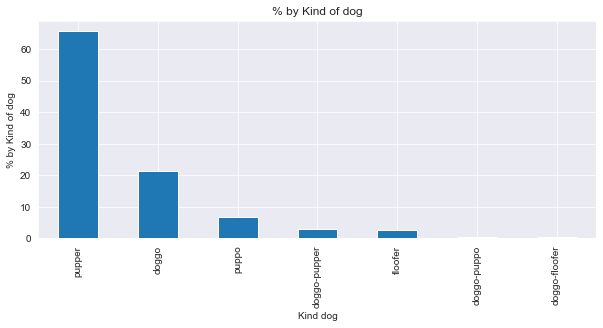

In [185]:

df_tam_clean_kind.plot(kind='bar', figsize=(10,4), title='% by Kind of dog', 
                        xlabel='Kind dog', ylabel='% by Kind of dog')

In [186]:
df_tam_clean[df_tam_clean['kind_dog'] == 'pupper'][['tweet_id', 'jpg_url', 'rating_score']].sort_values(by='rating_score',
                                                                                            ascending=False)

,tweet_id,jpg_url,rating_score
480,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,1.4
842,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1.4
1386,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1.4
420,807621403335917568,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,1.4
162,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,1.4
...,...,...,...
1278,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,0.7
1748,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,0.7
1759,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,0.6
1400,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,0.5


In [197]:
Image(url='https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg', width=500) 

In [188]:
df_tae_clean[df_tae_clean.tweet_id == '778027034220126208']

,tweet_id,timestamp,tweet_text,expanded_urls,name,rating_score,kind_dog
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,1.127,pupper


In this iterative job, we need to apply a new process to clean data, because 2.7 is the rating score of 27/10. We have a new quality data issue, because we have dots before 27.

<AxesSubplot:title={'center':'Histogram by name'}, xlabel='name', ylabel='Quantity of records'>

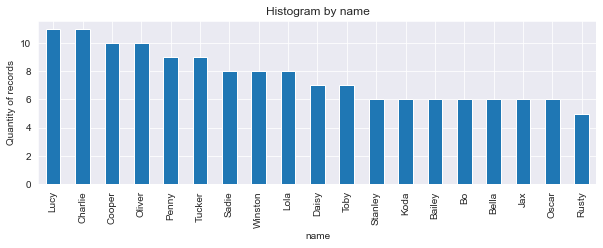

In [189]:
df_tam_clean['name'].value_counts()[1:20].plot(kind='bar', figsize=(10,3), title='Histogram by name', 
                                                     xlabel='name', ylabel='Quantity of records')

In [190]:
df_tam_clean[df_tam_clean['name'] == 'Lucy'][['tweet_id', 'name', 'jpg_url', 'rating_score']].sort_values(by='rating_score',
                                                                                            ascending=False)

,tweet_id,name,jpg_url,rating_score
237,837366284874571778,Lucy,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1.3
243,836260088725786625,Lucy,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1.3
537,785927819176054784,Lucy,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1.2
773,749774190421639168,Lucy,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1.2
1114,705970349788291072,Lucy,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1.2
520,788908386943430656,Lucy,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1.1
1150,702684942141153280,Lucy,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1.1
968,719339463458033665,Lucy,https://pbs.twimg.com/media/Cfuba6NW4AIeMHk.jpg,1.0
1320,689623661272240129,Lucy,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1.0
1695,674051556661161984,Lucy,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1.0


In [191]:
Image(url='https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg', width=500) 

In [192]:
df_tae_clean[df_tae_clean.tweet_id == '785927819176054784']

,tweet_id,timestamp,tweet_text,expanded_urls,name,rating_score,kind_dog
703,785927819176054784,2016-10-11 19:39:28+00:00,This is Lucy. She's strives to be the best potato she can be. 12/10 would boop https://t.co/lntsj7Fc4Y,https://twitter.com/dog_rates/status/785927819176054784/photo/1,Lucy,1.2,Undefined


In [193]:
df_tam_clean.breed_dog.value_counts()

NotDog                  308
golden_retriever        158
labrador_retriever      108
pembroke                95 
chihuahua               91 
                        .. 
japanese_spaniel        1  
bouvier_des_flandres    1  
irish_wolfhound         1  
entlebucher             1  
scotch_terrier          1  
Name: breed_dog, Length: 114, dtype: int64

<AxesSubplot:title={'center':'Histogram by breed_dog'}, xlabel='breed_dog', ylabel='Quantity of records'>

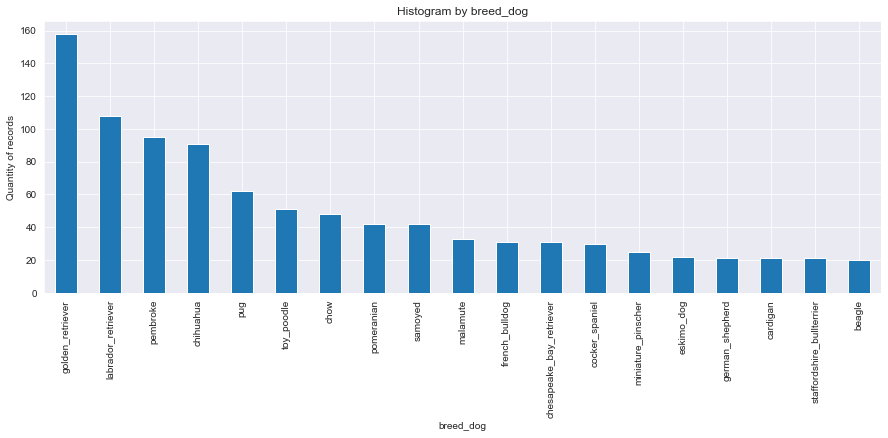

In [194]:

df_tam_clean['breed_dog'].value_counts()[1:20].plot(kind='bar', figsize=(15,5), title='Histogram by breed_dog', 
                                                     xlabel='breed_dog', ylabel='Quantity of records')


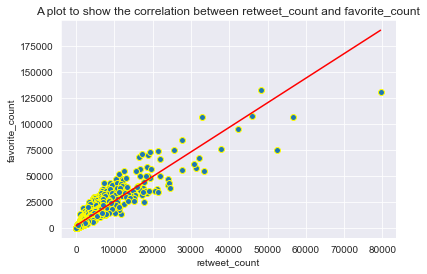

[[1.        0.9111402]
 [0.9111402 1.       ]]


In [195]:
# Graph correlation between two variables
# Reference https://dev.to/shanelee/how-to-plot-a-correlation-with-python-python-for-statistics-5ef

x = df_tam_clean['retweet_count']
y = df_tam_clean['favorite_count']
plt.scatter(x, y, edgecolors='yellow') 

plt.title('A plot to show the correlation between retweet_count and favorite_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.show()


print(np.corrcoef(x, y))


I see a strong corrleation between both variables

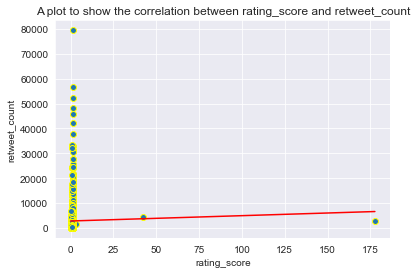

[[1.         0.01801266]
 [0.01801266 1.        ]]


In [196]:
x = df_tam_clean['rating_score']
y = df_tam_clean['retweet_count']
plt.scatter(x, y, edgecolors='yellow') 

plt.title('A plot to show the correlation between rating_score and retweet_count')
plt.xlabel('rating_score')
plt.ylabel('retweet_count')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.show()


print(np.corrcoef(x, y))


I see no correlation between rating_score and retweet_count